# KMeans

In [20]:
import math
import random

import numpy as np
from scipy.stats import mode

In [2]:
class KMeans(object):
    
    def __init__(self, n_clusters, max_iter=300):
        self.n_clusters = n_clusters
        self.max_iter = max_iter
        self.clusters = list(np.array(self.init_empty_clusters()))
        self.centroids = []
        self.labels = []
        
    
    def init_empty_clusters(self):
        return [[] for i in range(self.n_clusters)]
        
        
    def init_centroids(self, X):
        self.centroids = random.sample(list(X), self.n_clusters)
    
    
    def euclidean_distance(self, X, centroid):
        return [sum((x - centroid) ** 2) ** (1/2) for x in X]

    
    def find_data_clusters(self, X):
        distances = np.vstack([self.euclidean_distance(X, centroid) for centroid in self.centroids])
        
        return np.argmin(distances, axis=0)
    
    
    def generate_new_clusters(self, X, data_clusters):
        new_clusters = self.init_empty_clusters()
        for data_cluster, x in zip(data_clusters, X.tolist()):
            new_clusters[data_cluster].append(x)
        
        return [np.array(new_cluster) for new_cluster in new_clusters]
        
    
    def converged(self, new_clusters):
        # stop if new clusters is the same as previous clusters
        for old_cluster, new_cluster in zip(self.clusters, new_clusters):
            if not np.array_equal(old_cluster, new_cluster):
                return False
        
        return True
        
    
    def update_centroids(self):
        self.centroids = [sum(cluster) / len(cluster) for cluster in self.clusters]
        
        
    def fit(self, X):
        self.init_centroids(X)
        
        for _ in range(self.max_iter):
            data_clusters = self.find_data_clusters(X)
            new_clusters = self.generate_new_clusters(X, data_clusters)
            
            if self.converged(new_clusters):
                print('Already converged. Stopping.')
                break
            
            self.clusters = new_clusters
            self.update_centroids()
            
        self.labels = self.find_data_clusters(X)

## Comparison with SKLearn

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data  # we only take the first two features.
y = iris.target

In [6]:
clf = KMeans(3)
clf.fit(X)
clf.labels

Already converged. Stopping.


array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1], dtype=int64)

In [7]:
from sklearn.cluster import KMeans as SKLearnKMeans

clf_sklearn = SKLearnKMeans(3, init='random')
clf_sklearn.fit(X)
clf_sklearn.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [28]:
from scipy.stats import mode

def replace_labels(pred_labels):
    dict_replace = {
        mode(pred_labels[:50]).mode[0]: 0,
        mode(pred_labels[50:100]).mode[0]: 1,
        mode(pred_labels[100:]).mode[0]: 2
    }
    pred_labels = np.array([dict_replace[label] for label in pred_labels])
    
    return pred_labels

In [32]:
clf_labels = replace_labels(clf.labels)
clf_sklearn_labels = replace_labels(clf_sklearn.labels_)

In [36]:
print('total same cluster:', np.sum(clf_labels == clf_sklearn_labels), 'of 150')

total same cluster: 149 of 150


## Accuracy based on True Label

In [29]:
from sklearn.metrics import accuracy_score

In [49]:
print('created model accuracy: {0:.2f}%'.format(accuracy_score(clf_labels, y)*100))

created model accuracy: 88.67%


In [50]:
print('sklearn model accuracy: {0:.2f}%'.format(accuracy_score(clf_sklearn_labels, y)*100))

sklearn model accuracy: 89.33%


## Visualization

In [44]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'True Label')

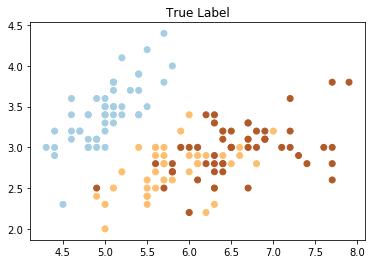

In [47]:
plt.scatter(X[:,0], X[:,1], c=y, cmap='Paired')
plt.title("True Label")

Text(0.5, 1.0, 'Created K-Means')

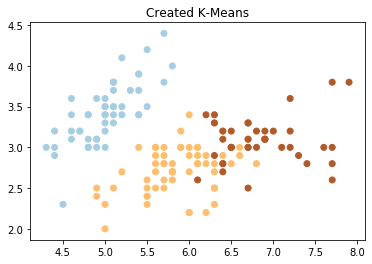

In [45]:
plt.scatter(X[:,0], X[:,1], c=clf_labels, cmap='Paired')
plt.title("Created K-Means")

Text(0.5, 1.0, 'SKLearn K-Means')

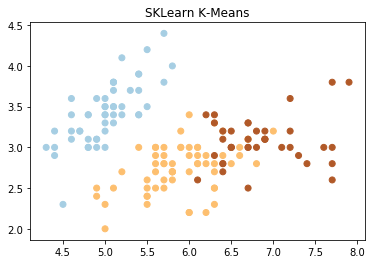

In [48]:
plt.scatter(X[:,0], X[:,1], c=clf_sklearn_labels, cmap='Paired')
plt.title("SKLearn K-Means")